In [2]:
#reading and displaying few records from the dataset
import pandas as pd
import numpy as np

In [3]:
credit_df = pd.read_csv(r"C:\Users\dell\Desktop\Current\Machine Learning\Python Programs\PYTHON_DATA\GERMAN_CREDIT_RATING.csv")

In [4]:
credit_df.head()

,S.No,CHK_ACCT,Duration,Credit History,Credit Amount,Balance in Savings A/C,Employment,Install_rate,Marital status,Present Resident,Age,Other installment,Num_Credits,Job,Credit classification,Credit_Rating
0,1,0DM,6,critical,1169,unknown,over-seven,4,Single,4,67,1,2,Unskilled,good.,0
1,2,less-200DM,48,all-paid-duly,5951,less100DM,four-years,2,female-divorced,2,22,0,1,skilled,bad.,1
2,3,no-account,12,critical,2096,less100DM,seven-years,2,Single,3,49,0,1,Unskilled,good.,0
3,4,0DM,42,all-paid-duly,7882,less100DM,seven-years,2,Single,4,45,0,1,skilled,good.,0
4,5,0DM,24,delay,4870,less100DM,four-years,3,Single,4,53,1,2,skilled,bad.,1


In [5]:
credit_df.iloc[0:5,1:7]

,CHK_ACCT,Duration,Credit History,Credit Amount,Balance in Savings A/C,Employment
0,0DM,6,critical,1169,unknown,over-seven
1,less-200DM,48,all-paid-duly,5951,less100DM,four-years
2,no-account,12,critical,2096,less100DM,seven-years
3,0DM,42,all-paid-duly,7882,less100DM,seven-years
4,0DM,24,delay,4870,less100DM,four-years


In [6]:
credit_df.iloc[0:5,7:]

,Install_rate,Marital status,Present Resident,Age,Other installment,Num_Credits,Job,Credit classification,Credit_Rating
0,4,Single,4,67,1,2,Unskilled,good.,0
1,2,female-divorced,2,22,0,1,skilled,bad.,1
2,2,Single,3,49,0,1,Unskilled,good.,0
3,2,Single,4,45,0,1,skilled,good.,0
4,3,Single,4,53,1,2,skilled,bad.,1


In [7]:
credit_df.shape

(800, 16)

In [8]:
#to find the number of posiive and negative observations in the response variable
credit_df.Credit_Rating.value_counts()

0    561
1    239
Name: Credit_Rating, dtype: int64

In [9]:
#creating a list of all independent variables 
X_features = list(credit_df)
X_features.remove('Credit_Rating')
X_features.remove('Credit classification')
X_features.remove('S.No')
X_features

['CHK_ACCT',
 'Duration',
 'Credit History',
 'Credit Amount',
 'Balance in Savings A/C',
 'Employment',
 'Install_rate',
 'Marital status',
 'Present Resident',
 'Age',
 'Other installment',
 'Num_Credits',
 'Job']

In [10]:
#Encoding Categorical Features
encoded_credit_df = pd.get_dummies(credit_df[X_features],drop_first = True)

In [11]:
list(encoded_credit_df.columns)

['Duration',
 'Credit Amount',
 'Install_rate',
 'Present Resident',
 'Age',
 'Other installment',
 'Num_Credits',
 'CHK_ACCT_less-200DM',
 'CHK_ACCT_no-account',
 'CHK_ACCT_over-200DM',
 'Credit History_ bank-paid-duly',
 'Credit History_ critical',
 'Credit History_ delay',
 'Credit History_all-paid-duly',
 'Balance in Savings A/C_ over1000DM',
 'Balance in Savings A/C_ unknown',
 'Balance in Savings A/C_Between 100 and 500 DM',
 'Balance in Savings A/C_Between 500 and 1000 DM',
 'Employment_ one-year',
 'Employment_ over-seven',
 'Employment_ seven-years',
 'Employment_ unemployed',
 'Marital status_ male-divorced',
 'Marital status_Married',
 'Marital status_Single',
 'Job_ skilled',
 'Job_Unemployed',
 'Job_Unskilled']

In [12]:
#defining X and Y features for model building
import statsmodels.api as sm 
Y = credit_df.Credit_Rating
X = sm.add_constant(encoded_credit_df)

In [13]:
#splitting the dataset into training and testing set
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,random_state = 42)

In [14]:
#building the logistic regression model
import statsmodels.api as sm
logit = sm.Logit(Y_train,X_train)
logit_model = logit.fit() 


Optimization terminated successfully.
         Current function value: 0.492026
         Iterations 6


In [15]:
logit_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                        Results: Logit
==============================================================================================
Model:                         Logit                     Pseudo R-squared:          0.213     
Dependent Variable:            Credit_Rating             AIC:                       609.0691  
Date:                          2019-12-02 14:58          BIC:                       734.5793  
No. Observations:              560                       Log-Likelihood:            -275.53   
Df Model:                      28                        LL-Null:                   -350.14   
Df Residuals:                  531                       LLR p-value:               1.7139e-18
Converged:                     1.0000                    Scale:                     1.0000    
No. Iterations:                6.0000                                                         
----------------------------------------------------------------------------------------------
                                                Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
----------------------------------------------------------------------------------------------
const                                          -0.0754   0.9798 -0.0769 0.9387 -1.9957  1.8450
Duration                                        0.0104   0.0117  0.8865 0.3754 -0.0125  0.0333
Credit Amount                                   0.0002   0.0001  2.7682 0.0056  0.0000  0.0003
Install_rate                                    0.3399   0.1090  3.1168 0.0018  0.1262  0.5536
Present Resident                                0.0719   0.1037  0.6933 0.4881 -0.1313  0.2751
Age                                            -0.0257   0.0112 -2.2941 0.0218 -0.0477 -0.0037
Other installment                               0.4044   0.3369  1.2003 0.2300 -0.2560  1.0649
Num_Credits                                     0.0021   0.3082  0.0069 0.9945 -0.6019  0.6062
CHK_ACCT_less-200DM                            -0.0610   0.2672 -0.2282 0.8195 -0.5847  0.4628
CHK_ACCT_no-account                            -1.6015   0.2895 -5.5329 0.0000 -2.1688 -1.0342
CHK_ACCT_over-200DM                            -1.0831   0.4588 -2.3608 0.0182 -1.9822 -0.1839
Credit History_ bank-paid-duly                 -0.0308   0.7102 -0.0434 0.9654 -1.4228  1.3612
Credit History_ critical                       -1.6016   0.5342 -2.9983 0.0027 -2.6485 -0.5546
Credit History_ delay                          -1.2848   0.5941 -2.1625 0.0306 -2.4492 -0.1203
Credit History_all-paid-duly                   -0.8586   0.5270 -1.6290 0.1033 -1.8916  0.1744
Balance in Savings A/C_ over1000DM             -0.9318   0.6180 -1.5077 0.1316 -2.1431  0.2795
Balance in Savings A/C_ unknown                -0.5656   0.3035 -1.8633 0.0624 -1.1605  0.0293
Balance in Savings A/C_Between 100 and 500 DM   0.0751   0.3427  0.2191 0.8265 -0.5966  0.7467
Balance in Savings A/C_Between 500 and 1000 DM -0.9037   0.6552 -1.3793 0.1678 -2.1878  0.3805
Employment_ one-year                            0.1437   0.3070  0.4681 0.6397 -0.4580  0.7454
Employment_ over-seven                         -0.2775   0.3170 -0.8754 0.3814 -0.8989  0.3439
Employment_ seven-years                        -0.5425   0.3308 -1.6397 0.1011 -1.1909  0.1059
Employment_ unemployed                          0.3238   0.5229  0.6192 0.5358 -0.7012  1.3487
Marital status_ male-divorced                   0.3935   0.4841  0.8129 0.4163 -0.5553  1.3423
Marital status_Married                          0.1876   0.3810  0.4923 0.6225 -0.5591  0.9342
Marital status_Single                          -0.4298   0.2571 -1.6722 0.0945 -0.9337  0.0740
Job_ skilled                                    0.1159   0.3504  0.3308 0.7408 -0.5708  0.8026
Job_Unemployed                                 -0.3676   0.7787 -0.4720 0.6369 -1.8939  1.1587
Job_Unskilled                                  -0.0018   0.4084 -0.0045 0.9964 -0.8022  0.7985
=

In [16]:
#model diagnostics
def get_significant_vars(x):
    var_p_vals_df = pd.DataFrame(x.pvalues)
    #print(var_p_vals_df)
    var_p_vals_df['vars'] = var_p_vals_df.index
    var_p_vals_df.columns = ['pvals','vars']
    #print(var_p_vals_df['pvals'],var_p_vals_df['vars'])
    return list(var_p_vals_df[var_p_vals_df.pvals<=0.05]["vars"])

In [17]:
significant_vars = get_significant_vars(logit_model)

In [18]:
significant_vars

['Credit Amount',
 'Install_rate',
 'Age',
 'CHK_ACCT_no-account',
 'CHK_ACCT_over-200DM',
 'Credit History_ critical',
 'Credit History_ delay']

In [19]:
final_logit = sm.Logit(Y_train,sm.add_constant(X_train[significant_vars])).fit()

Optimization terminated successfully.
         Current function value: 0.521081
         Iterations 6


In [20]:
final_logit.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                             Results: Logit
========================================================================
Model:                 Logit              Pseudo R-squared:   0.167     
Dependent Variable:    Credit_Rating      AIC:                599.6102  
Date:                  2019-12-02 14:58   BIC:                634.2337  
No. Observations:      560                Log-Likelihood:     -291.81   
Df Model:              7                  LL-Null:            -350.14   
Df Residuals:          552                LLR p-value:        3.7922e-22
Converged:             1.0000             Scale:              1.0000    
No. Iterations:        6.0000                                           
------------------------------------------------------------------------
                          Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
------------------------------------------------------------------------
const                    -0.4385   0.4672 -0.9387 0.3479 -1.3541  0.4771
Credit Amount             0.0002   0.0000  4.0831 0.0000  0.0001  0.0002
Install_rate              0.2947   0.0977  3.0151 0.0026  0.1031  0.4863
Age                      -0.0267   0.0094 -2.8330 0.0046 -0.0452 -0.0082
CHK_ACCT_no-account      -1.7346   0.2448 -7.0854 0.0000 -2.2145 -1.2548
CHK_ACCT_over-200DM      -1.1121   0.4274 -2.6019 0.0093 -1.9499 -0.2744
Credit History_ critical -0.6778   0.2521 -2.6886 0.0072 -1.1719 -0.1837
Credit History_ delay    -0.4645   0.3705 -1.2538 0.2099 -1.1906  0.2616
========================================================================

"""

In [21]:
#predicting on test data
Y_pred_df = pd.DataFrame({"actual": Y_test, "predicted_prob": final_logit.predict(sm.add_constant(X_test[significant_vars]))})

In [22]:
Y_pred_df.sample(10,random_state = 42)

,actual,predicted_prob
360,0,0.334354
346,0,0.399071
393,0,0.208565
367,0,0.464480
76,1,0.615904
133,0,0.126841
292,0,0.339375
786,0,0.127250
456,0,0.297737
218,0,0.499373


In [23]:
Y_pred_df['predicted'] = Y_pred_df.predicted_prob.map(lambda x: 1 if x >0.5 else 0)

In [24]:
Y_pred_df.sample(10,random_state = 42)

,actual,predicted_prob,predicted
360,0,0.334354,0
346,0,0.399071,0
393,0,0.208565,0
367,0,0.464480,0
76,1,0.615904,1
133,0,0.126841,0
292,0,0.339375,0
786,0,0.127250,0
456,0,0.297737,0
218,0,0.499373,0


In [25]:
#craeting a confusion matrix
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [26]:
from sklearn import metrics
def draw_cm(actual, predicted):
    cm = metrics.confusion_matrix(actual, predicted, [1,0])
    sn.heatmap(cm, annot=True, fmt='0.2f', 
               xticklabels = ["Bad credit","Good credit"],
               yticklabels = ["Bad credit","Good credit"])
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

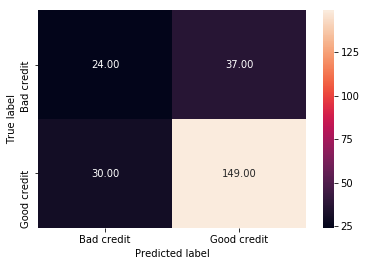

In [27]:
draw_cm(Y_pred_df.actual,Y_pred_df.predicted)

In [28]:
#measuring accuracies
print(metrics.classification_report(Y_pred_df.actual,Y_pred_df.predicted))

             precision    recall  f1-score   support

          0       0.80      0.83      0.82       179
          1       0.44      0.39      0.42        61

avg / total       0.71      0.72      0.72       240



In [29]:
#obtaining Reciever Operating Curve(ROC) and Area under the Curve(AUC)
def draw_roc(actual,probs):
    fpr,    tpr,    thresholds = metrics.roc_curve(actual,probs,drop_intermediate = True)
    auc_score = metrics.roc_auc_score(actual,probs)
    plt.figure(figsize = (12,8))
    plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' %auc_score)
    plt.plot([0,1],[0,1],'k--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.show()
    return thresholds

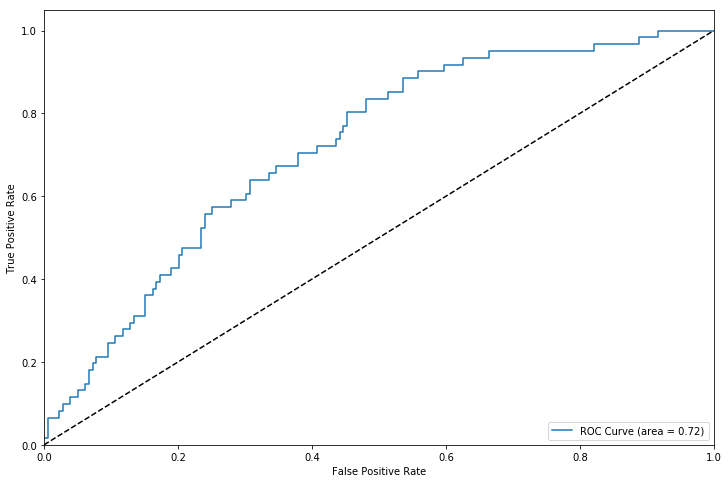

In [30]:
thresholds = draw_roc(Y_pred_df.actual,Y_pred_df.predicted_prob)